## **Linear Regression using Pytorch**

## **Import Libraries**

In [61]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

## **Create Data**

In [62]:
weight = 46
bias = 2
x = np.array([x for x in range(200)])
X = x.reshape(-1,1)
y = weight * X.flatten() + bias
print(f'Input Shape: {X.shape} | Output Shape: {y.shape}')

Input Shape: (200, 1) | Output Shape: (200,)


## **About Code**
The input data (X) is reshaped to two dimensions to conform to the standard format expected by machine learning libraries and to clearly distinguish between samples and features.
The output data (y) remains one-dimensional because it represents a single target value for each sample.

`X = X.reshape(-1, 1).`
- This line reshapes the X array

- **reshape** is a NumPy function used to change the dimensions of an array.

- `-1` is a special value that tells `NumPy` to automatically calculate the appropriate dimension to maintain the total number of elements.
- `1` indicates that we want the second dimension to have a size of 1.
- The effect is that X is transformed from a **1-dimensional** array to a **2-dimensional** array with 100 rows and 1 column. This is often necessary for machine learning algorithms that expect input data in this format.

`y = 46 + 2 * X.flatten()`

- `X.flatten()` converts the 2-dimensional **X** array back into a 1-dimensional array for the calculation.

- The equation` 46 + 2 * X.flatten()` represents a simple linear relationship: `y = bias + weight * x`. It calculates the corresponding **y** value for each **x** value in the **X** array.


## **Normalization Data**

**Question: Why do we norm data first in Pytorch deep learning?**

Normalizing data before using it in PyTorch models is crucial for several reasons:

1. **Improved Convergence**
+ Gradient Descent Stability: Machine learning algorithms like gradient descent perform better when data is scaled. Normalization ensures that the features are on a similar scale, preventing large features from dominating the optimization process. This leads to faster convergence.

+ Smaller Learning Rates: When data is normalized, gradients are more stable, allowing for effective use of smaller and consistent learning rates.

2. **Numerical Stability**

+ Avoid Overflow or Underflow: Features with very large or very small values can lead to numerical instability during computation, especially in deep networks. Normalization minimizes this risk.

3. **Equal Feature Contribution**

+ Balance Across Features: Normalization ensures that no single feature disproportionately influences the model, promoting balanced learning from all inputs.

4. **Activation Function Efficiency**

+ Optimal Function Range: Many activation functions, like Sigmoid or Tanh, perform optimally when inputs are centered around 0 and have a small variance. Normalized data ensures this condition, leading to better model performance.

5. **Interpretability of Weights**
+ Consistent Weight Scaling: In a normalized dataset, the learned weights are easier to interpret as they are not skewed by varying scales of the features.

**Common Normalization Techniques in PyTorch**
1. Min-Max Scaling: Scales data to a specific range, often [0, 1].

2. Standardization: Centers data to have a mean of 0 and a standard deviation of 1.

3. Normalization Layers: PyTorch provides layers like nn.BatchNorm for in-network normalization and transforms.Normalize for preprocessing.

**Examples**

**Min-Max Normalization formula**: (x - min) / (max - min)
```
data = torch.tensor([[2.0, 4.0], [6.0, 8.0]])
data_min = torch.min(data, dim=0).values
data_max = torch.max(data, dim=0).values
normalized_data = (data - data_min) / (data_max - data_min)
```
**Z-Score Normalization formula**: (x - mean) / std
```
mean = torch.mean(data, dim=0)
std = torch.std(data, dim=0)
standardized_data = (data - mean) / std
```
**Batch-Normalization Layer**
- (*Batch of 5 samples with 3 features each*)

```
batch_norm = nn.BatchNorm1d(num_features=3)
features = torch.rand(5, 3)
normalized_features = batch_norm(features)
```







In [63]:
# Standardized X
x_mean, x_std = X.mean(), X.std()
normalized_x = (X - x_mean) / x_std
# Turn to tensor
X_tensor = torch.tensor(normalized_x, dtype=torch.float32)

# Standardized y
y_mean, y_std = y.mean(), y.std()
normalized_y = (y - y_mean) / y_std
# Turn to tensor
y_tensor = torch.tensor(normalized_y, dtype=torch.float32)

print(f'The Normalized Input is: {X_tensor[0:5]} | and Its Shape is: {X_tensor.shape}')
print(f'The Normalized Output is: {y_tensor[0:5]} | and Its Shape is: {y_tensor.shape}')

The Normalized Input is: tensor([[-1.7234],
        [-1.7061],
        [-1.6888],
        [-1.6714],
        [-1.6541]]) | and Its Shape is: torch.Size([200, 1])
The Normalized Output is: tensor([-1.7234, -1.7061, -1.6888, -1.6714, -1.6541]) | and Its Shape is: torch.Size([200])


## **Split Data**

In [64]:
train_split = int(0.8*len(X))
X_train, y_train = X_tensor[:train_split], y_tensor[:train_split]
X_test, y_test = X_tensor[train_split:], y_tensor[train_split:]
print(f'The number of train samples: {len(X_train)}')
print(f'The number of test samples: {len(X_test)}')

The number of train samples: 160
The number of test samples: 40


In [65]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions = None):
    plt.figure(figsize=(4,2.5), dpi=170, facecolor='#cae6e4')
    label_font= {'color':'k',
                'weight':'bold',
                'size':8}
    title_font = {'color':'k',
                  'weight':'bold',
                  'size':10}
    plt.title('Pre-Visualizing  Normalized-Data', fontdict=title_font)
    plt.xlabel('Inputs', fontdict=label_font)
    plt.ylabel('Outputs', fontdict=label_font)

    plt.scatter(X_train, y_train, c='b', s=4, label='Training Samples')
    plt.scatter(X_test, y_test, c='r', s=4, label='Test samples')
    if predictions is not None:
      plt.scatter(X_test, predictions, c='g', s=4, label='predictions')

    plt.legend()
    plt.show()

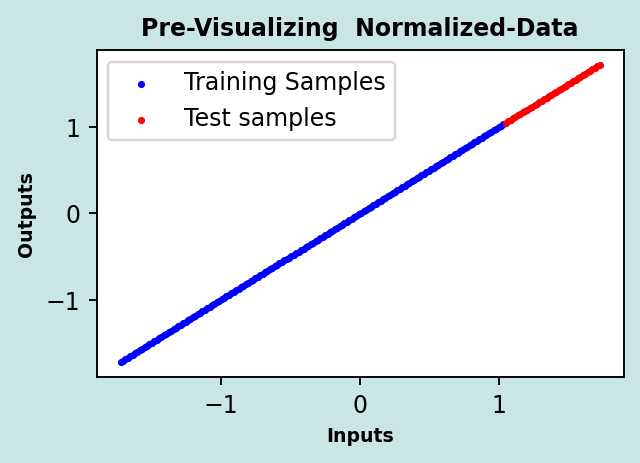

In [66]:
plot_predictions()

## **Build Model**

In [67]:
class LinearRegressionModel(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    return self.linear(x)

In [68]:
in_features = 1
out_features = 1
model_100 = LinearRegressionModel(in_features, out_features)

## **Choose Criterion and Optimizer**

In [69]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model_100.parameters(),
                      lr = 0.1)

## **Train/Test Loops**

In [70]:
epochs = 35
epoch_count = []
train_loss_values = []
test_loss_values = []
for epoch in range(epochs):

  #Train
  model_100.train()
  #Forward Pass
  train_preds = model_100(X_train)
  #Calculate Loss
  train_loss = criterion(train_preds.squeeze(1), y_train)
  #Zero Gradient
  optimizer.zero_grad()
  #Backward
  train_loss.backward()
  #Optimizing step by step
  optimizer.step()

  #Test
  model_100.eval()
  #Forward
  with torch.inference_mode():
    test_preds = model_100(X_test)
  #Calculate Loss
  test_loss = criterion(test_preds.squeeze(1), y_test)

  epoch_count.append(epoch)
  train_loss_values.append(train_loss)
  test_loss_values.append(test_loss)

  print(f'Epoch: {epoch +1 }/{epochs} | Train Loss Value: {train_loss} | Test Loss Value: {test_loss}')



Epoch: 1/35 | Train Loss Value: 1.5775377750396729 | Test Loss Value: 2.385608196258545
Epoch: 2/35 | Train Loss Value: 1.0133881568908691 | Test Loss Value: 1.9192886352539062
Epoch: 3/35 | Train Loss Value: 0.6712417602539062 | Test Loss Value: 1.5445010662078857
Epoch: 4/35 | Train Loss Value: 0.4589200019836426 | Test Loss Value: 1.2431139945983887
Epoch: 5/35 | Train Loss Value: 0.3235587775707245 | Test Loss Value: 1.0006587505340576
Epoch: 6/35 | Train Loss Value: 0.23462741076946259 | Test Loss Value: 0.8055599331855774
Epoch: 7/35 | Train Loss Value: 0.17432507872581482 | Test Loss Value: 0.6485379934310913
Epoch: 8/35 | Train Loss Value: 0.13214047253131866 | Test Loss Value: 0.5221446752548218
Epoch: 9/35 | Train Loss Value: 0.1017635241150856 | Test Loss Value: 0.4203963279724121
Epoch: 10/35 | Train Loss Value: 0.07932721078395844 | Test Loss Value: 0.338482141494751
Epoch: 11/35 | Train Loss Value: 0.0624016635119915 | Test Loss Value: 0.2725328207015991
Epoch: 12/35 | Tr

## **Visualize**

In [71]:
for x in range(len(test_loss_values)):
  test_loss_values[x] = test_loss_values[x].detach().numpy()
for x in range(len(train_loss_values)):
  train_loss_values[x] = train_loss_values[x].detach().numpy()


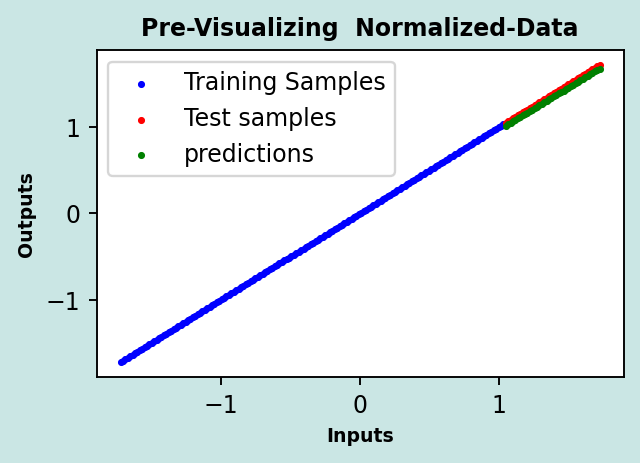

In [72]:
plot_predictions(predictions= test_preds)

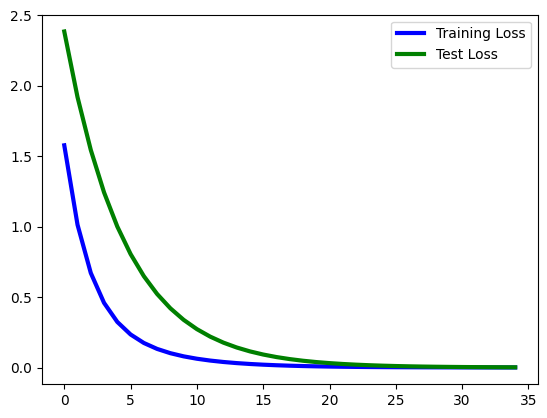

In [73]:
plt.plot(epoch_count, train_loss_values, color='b', label='Training Loss', linewidth=3)
plt.plot(epoch_count, test_loss_values, color='g', label='Test Loss', linewidth=3)
plt.legend()
plt.show()

## **Learned Weight and Bias**

In [74]:
print(model_100.state_dict().keys())

odict_keys(['linear.weight', 'linear.bias'])


In [75]:
weight_value = model_100.state_dict()['linear.weight'].item()
bias_value = model_100.state_dict()['linear.bias'].item()
weight_value, bias_value

(0.9815778732299805, -0.013064878061413765)

## **Make a prediction**

In [76]:
new_x = 254
normalized_new_x = (new_x - x_mean) / x_std
new_x_tensor = torch.tensor([normalized_new_x], dtype = torch.float32)
new_x_tensor
model_100.eval()
with torch.inference_mode():
  new_pred = model_100(new_x_tensor)
denormalized_new_pred = new_pred.item() * y_std + y_mean
denormalized_new_pred

11520.376440302784

In [77]:
new_test_loss = (((254*weight+bias)-denormalized_new_pred) / (256*weight+bias)) * 100
print(f' The real value: {254*weight+bias}')
print(f' The predicted value: {denormalized_new_pred}')
print(f' The loss value: %{new_test_loss}')

 The real value: 11686
 The predicted value: 11520.376440302784
 The loss value: %1.406211238726579


## **Save Model**

In [78]:
from pathlib import Path
# Path
model_path = Path('Models')
model_path.mkdir(exist_ok=True, parents=True)
# name
model_name = '03-Linear-Regression'
# model_save_path
model_save_path= model_path / model_name
torch.save(obj = model_100.state_dict(),
           f = model_save_path)

## **Load Model**

In [79]:
loaded_model_100 = LinearRegressionModel(in_features, out_features)
loaded_model_100.load_state_dict(torch.load(f=model_save_path))

<ipython-input-79-8ef408ef51fc>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_100.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [80]:
print(f'The parameters of loaded model:')
for name, parameter in model_100.named_parameters():
  print(f'name: {name} : {parameter.data}')


The parameters of loaded model:
name: linear.weight : tensor([[0.9816]])
name: linear.bias : tensor([-0.0131])


In [81]:
with torch.inference_mode():
  new_predicts = loaded_model_100(X_test)
new_predicts_loss = criterion(new_predicts, X_test)
new_predicts == test_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])